# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math
# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
# your code here

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
# your code here

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
# your code here

In [5]:
class GaussianNB:
  def sepClasses(self, X, y):
    self.classes = np.unique(y)
    classIndex={}
    subsets = {}
    cls, counts = np.unique(y, return_counts=True)
    temp=zip(cls, counts)
    self.classFrequency = dict(temp)
    classes=self.classes
    for i in classes:
      classIndex[i] = np.argwhere(y==i)
      subsets[i] = X[classIndex[i], :]
      l=list(self.classFrequency.values())
      sumvalue=sum(l)
      self.classFrequency[i] = self.classFrequency[i] / sumvalue
    return subsets

  def fit(self, X, y, regularizationValue=1e-9):
    separatedX = self.sepClasses(X, y)
    self.means={}
    self.std = {}
    classes=self.classes
    for i in classes:
      temp=np.mean(separatedX[i], axis=0)
      self.means[i] = temp[0]
      temp=np.std(separatedX[i], axis=0)
      self.std[i] = temp[0] + regularizationValue

  def calProbability(self, x, mean, stdev):
    num=(x - mean) ** 2
    den=2 * stdev ** 2
    temp=num / den
    exponent = math.exp(-temp)
    res=math.sqrt(2 * math.pi) * stdev
    res=1 / res
    return res * exponent
  
  def predictProbability(self, X):

    self.classProbability = {}
    classes=self.classes
    for p in classes:
        self.classProbability[p] = math.log(self.classFrequency[p], math.e)
        
    for cls in self.classes:
        for i in range(len(self.means)):
            temp=math.log(self.calProbability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
            self.classProbability[cls]=self.classProbability[cls]+temp
    for p in self.classProbability:
        self.classProbability[p] = math.e ** self.classProbability[p]
   
    return self.classProbability
  
  def predict(self, X):
     
    prediction = []
    for rows in X:
        predictedClass=None
        maximumProbability =0
        for i, prob in self.predictProbability(rows).items():
            if prob>maximumProbability:
                maximumProbability=prob
                predictedClass = i
        prediction.append(predictedClass)
    return prediction

The common problem with the likelihoods in this implementation is that they can be zero, which results in a division by zero error when calculating the probabilities. This can occur when the standard deviation of a feature in a class is zero, meaning that all the samples in that class have the same value for that feature.

To fix this issue, we can add a small regularization term to the standard deviation, known as a "regularization_val," which will prevent it from being zero. This is equivalent to assuming that every feature in every class has a small amount of variability, even if it is not observed in the training data. We can do this by modifying the fit method of the GaussianNB class.

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [6]:
data = pd.read_csv('wifiLocalization.txt', header=None, sep='\t')

In [7]:
# your code here
data = data.iloc[1: , :]
data.columns = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "class"]
data.head(6)

,c1,c2,c3,c4,c5,c6,c7,class
1,-47,-53,-54,-49,-63,-88,-85,3
2,-50,-57,-60,-43,-66,-77,-82,3
3,-44,-50,-57,-45,-61,-72,-67,2
4,-48,-59,-53,-45,-74,-81,-81,3
5,-60,-54,-59,-65,-66,-83,-84,1
6,-60,-53,-60,-67,-64,-81,-79,1


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [8]:
# your code here
from sklearn.model_selection import train_test_split

 
data = data.to_numpy()
 
X = data[:, :-1]
y = data[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
 
X_train = np.array(X_train, int)
X_test = np.array(X_test, int)
y_train = np.array(y_train, int)
y_test = np.array(y_test, int)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 7)
(1600,)
(400, 7)
(400,)


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

## 1.) Estimate your model on the training data

In [12]:
# your code here
classifier = GaussianNB()

In [13]:
classifier.fit(X_train, y_train)

## 2.) Plot the Gaussian probability density functions for each class after estimation.

In [14]:
from scipy.stats import norm
 
classes = np.unique(y_train)

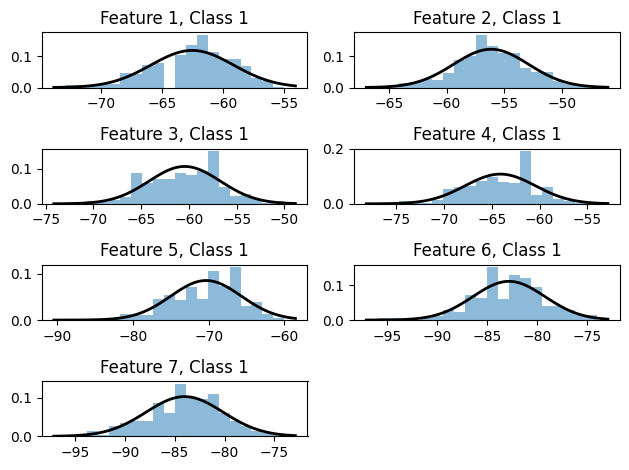

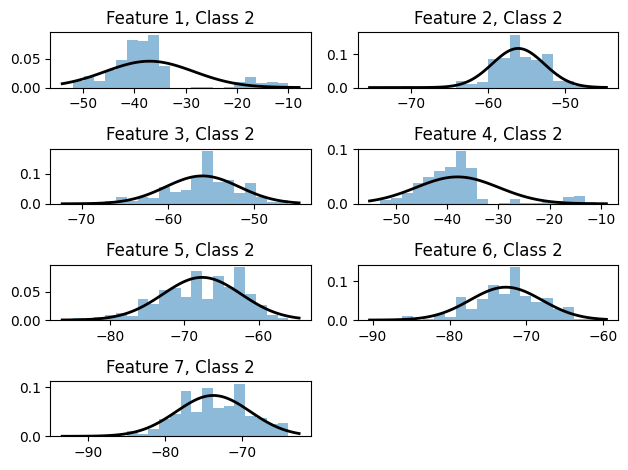

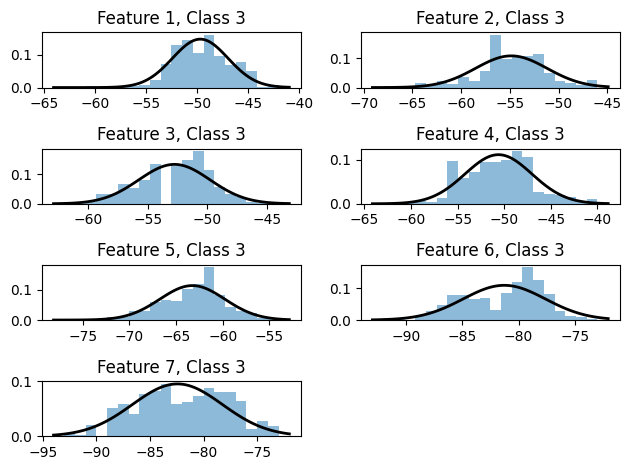

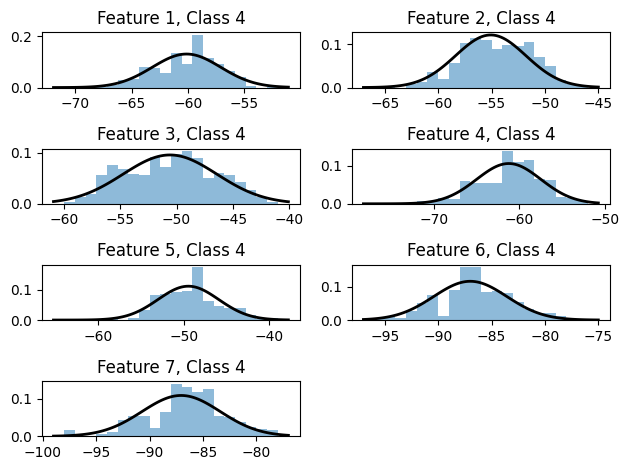

In [15]:
for cls in classes:
    
    data = X_train[y_train == cls]
    n=data.shape[1]
    for i in range(n):
        plt.subplot(4, 2, i+1)
        plt.hist(data[:, i], bins=20, density=True, alpha=0.5)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, classifier.means[cls][i], classifier.std[cls][i])
        plt.plot(x, p, 'k', linewidth=2)
        plt.title('Feature %d, Class %d' % (i+1, cls))
    plt.tight_layout()
    plt.show()


## 3.) Classify the test data using your model.

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.905


## 4.) Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?

In [18]:
def plotMisclassifiedSamples(X_test, y_test, y_pred, means, stds):
    misclassifiedIndices = np.nonzero(y_test != y_pred)[0][0:5]
    means =  np.array(list(means.values()))
    stds = np.array(list(stds.values()))
    for i in misclassifiedIndices:
        sample = X_test[i]
        trueClass = y_test[i]
        predictedClass = y_pred[i]

        fig, ax = plt.subplots()
        ax.hist(X_test[:, 0], bins=30, density=True, alpha=0.5, label='Class 1')
        ax.hist(X_test[:, 1], bins=30, density=True, alpha=0.5, label='Class 2')
        ax.hist(X_test[:, 2], bins=30, density=True, alpha=0.5, label='Class 3')
        ax.hist(X_test[:, 3], bins=30, density=True, alpha=0.5, label='Class 4')
        
        x_range = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), num=100)
        n=len(means)
        for j in range(n):
            pdf = norm.pdf(x_range, loc=means[j][0], scale=stds[j][0])
            ax.plot(x_range, pdf, label=f'Class {j+1} PDF')

        ax.axvline(x=sample[0], color='r', linestyle='--', label='Misclassified Sample')
        ax.set_title(f'True class: {trueClass}, Predicted class: {predictedClass}')
        ax.legend()
        plt.show()

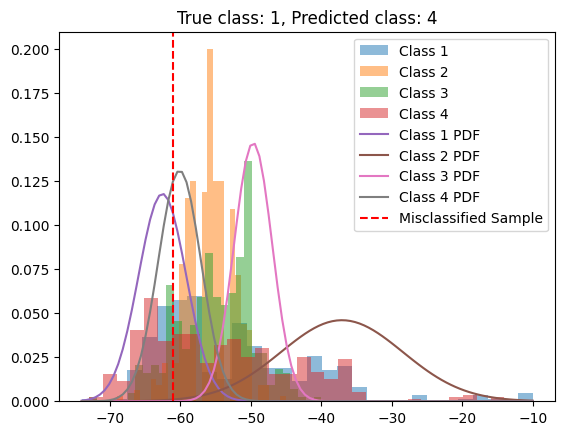

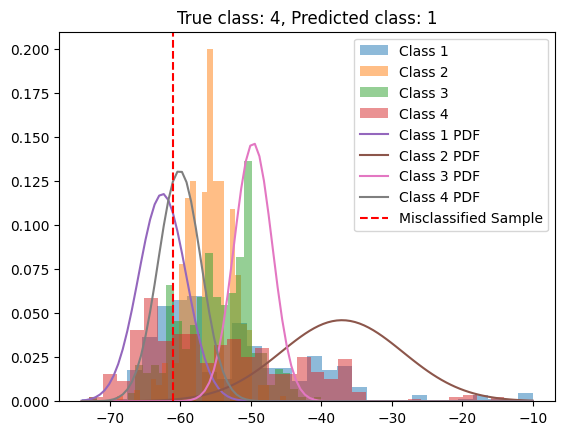

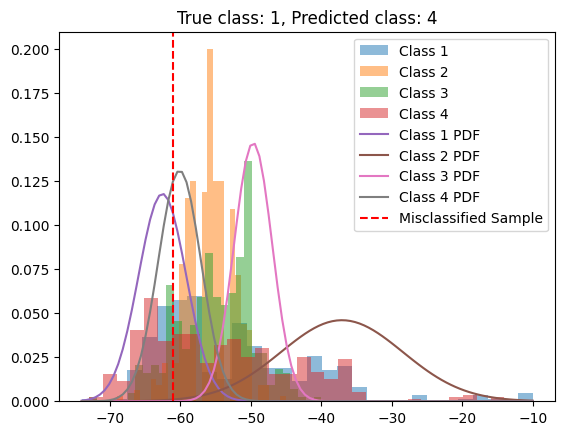

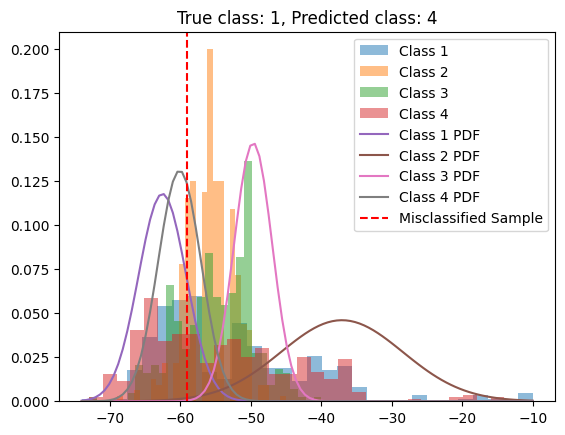

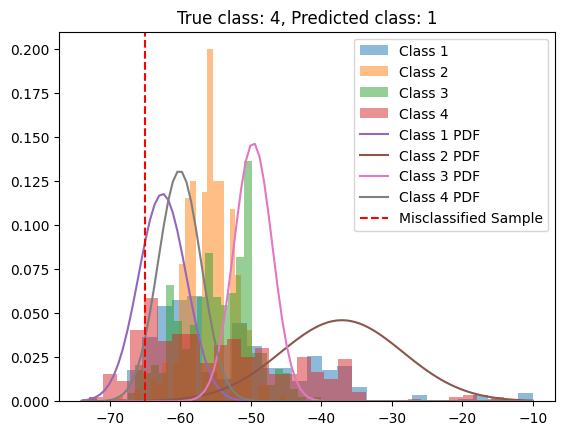

In [19]:
plotMisclassifiedSamples(X_test, y_test, y_pred, classifier.means, classifier.std)

Observations:

- Misclassified samples tend to be clustered near the decision boundaries separating different classes.

- For some cases, the true and predicted labels have very similar Gaussian probability density functions for n    misclassified samples, suggesting that the classifier struggled to differentiate between these classes.

- For other cases, the Gaussian probability density functions for the true and predicted labels are noticeably different, indicating that the classifier assigned an incorrect label to these samples.

## 5.) Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?

In [20]:

data = pd.read_csv('wifiLocalization.txt', delimiter='\t')

column_names=[]

for i in range(1,8):
    column_names.append('WiFi'+str(i))

column_names.append('Room')
data.columns = column_names
data.head(6)

,WiFi1,WiFi2,WiFi3,WiFi4,WiFi5,WiFi6,WiFi7,Room
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1
5,-60,-53,-60,-67,-64,-81,-79,1


In [21]:
import seaborn as sns

In [22]:

def CorrelatedFeatures(df, threshold=0.9):
     
    correlationMatrix = df.corr()
    correlatedFeatures = set()
    sns.heatmap(correlationMatrix, annot=True, cmap="YlGnBu")
    
    n=len(correlationMatrix.columns)
    i=0
    while i<n:
        j=0
        while j<i:
            if  threshold < abs(correlationMatrix.iloc[i, j]):
                colname = correlationMatrix.columns[i]
                correlatedFeatures.add(colname)
            j=j+1
        i=i+1

    
    if len(correlatedFeatures) != 0:
        print("Highly correlated feature:", correlatedFeatures)
    else :
        print("No highly correlated feature found")
    
    plt.show()

Highly correlated feature: {'WiFi4'}


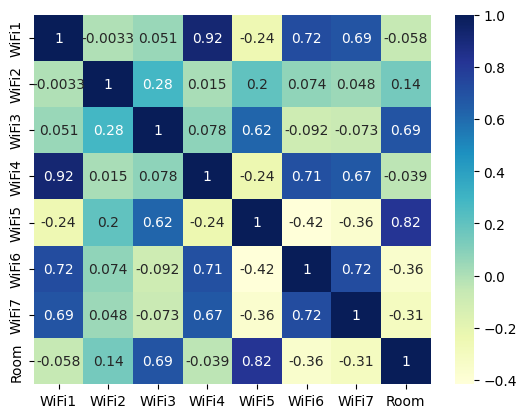

In [23]:
CorrelatedFeatures(data)

In [24]:
reducedData = data.drop(columns=['WiFi4'])
reducedData = reducedData.astype(int)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(reducedData.iloc[:, :-1], reducedData.iloc[:, -1], test_size=0.2, random_state=0)


In [26]:
X_train = np.array(X_train, int)
y_train = np.array(y_train, int)
X_test = np.array(X_test, int)
y_test = np.array(y_test, int)

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


In [28]:
y_pred = gnb.predict(X_test)
 
print(accuracy_score(y_test, y_pred))

0.97


## 6.) Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?

In [29]:
data = pd.read_csv('wifiLocalization.txt', header=None, sep='\t')
data = data.iloc[1: , :]
data.columns = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "class"]
data = data.to_numpy()


In [30]:
X = data[:, :-1]
y = data[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train = np.array(X_train, int)
X_test = np.array(X_test, int)
y_train = np.array(y_train, int)
y_test = np.array(y_test, int)


In [33]:
for i in range(7):
  train = np.delete(X_train, i, axis=1)
  test = np.delete(X_test, i, axis=1)
  classifier = GaussianNB()
  classifier.fit(train, y_train)
  y_pred = classifier.predict(test)
  print('Removed column number',i,'then accuracy is ',accuracy_score(y_test, y_pred))

Removed column number 0 then accuracy is  0.9275
Removed column number 1 then accuracy is  0.98
Removed column number 2 then accuracy is  0.9825
Removed column number 3 then accuracy is  0.97
Removed column number 4 then accuracy is  0.905
Removed column number 5 then accuracy is  0.905
Removed column number 6 then accuracy is  0.905


There isn't much change in the accuracy even after dropping some features.

## 7.) Compare your results with the scikit-learn implementation. You can use the GaussianNB class from sklearn.naive_bayes. You can use the score function to get the accuracy of the model on the test set.

In [34]:
data = pd.read_csv('wifiLocalization.txt', header=None, sep='\t')
data = data.iloc[1: , :]
data.columns = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "class"]
data.head(6)


,c1,c2,c3,c4,c5,c6,c7,class
1,-47,-53,-54,-49,-63,-88,-85,3
2,-50,-57,-60,-43,-66,-77,-82,3
3,-44,-50,-57,-45,-61,-72,-67,2
4,-48,-59,-53,-45,-74,-81,-81,3
5,-60,-54,-59,-65,-66,-83,-84,1
6,-60,-53,-60,-67,-64,-81,-79,1


In [35]:
data = data.to_numpy() 
X = data[:, :-1]
y = data[:, -1]

In [36]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
 
X_train = np.array(X_train, int)
X_test = np.array(X_test, int)
y_train = np.array(y_train, int)
y_test = np.array(y_test, int)

In [38]:
from sklearn.naive_bayes import GaussianNB
 
gnbobj = GaussianNB()
gnbobj.fit(X_train, y_train)


GaussianNB()

In [39]:
 
y_predSklearn = gnbobj.predict(X_test)

sklearnAccuracy = gnbobj.score(X_test, y_test)
print(sklearnAccuracy)

0.985
